In [1]:
import pandas as pd
from dfply import *
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,Dense,Flatten
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import preprocessing
from tensorflow.keras.optimizers import SGD

print(tf.__version__)

if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")
  

2.1.0
Default GPU Device: /device:GPU:0


In [2]:
df = pd.read_csv("E:\\ProjectData\\ERAU-REU\\Project-Drone-Behavior\\behavior-captures\\processed-no-scaling.csv")
df.shape
np.random.shuffle(df.values)

In [3]:
#plot = df.plot(legend=False)
#plot.figure.savefig("E:\\ProjectData\\ERAU-REU\\Project-Drone-Behavior\\plots\\allplot.png")

In [4]:
#plot = videoDf.plot(legend=False)
#plot.figure.savefig("E:\\ProjectData\\ERAU-REU\\Project-Drone-Behavior\\plots\\allVideoPlot.png")

In [5]:
df >>= mutate(drone_present = case_when([df.behavior == 'surround','yes'],
[df.behavior == 'straight','yes'],
[df.behavior == 'noise','no']))
presence_labs = df['drone_present']

In [6]:
values = np.array(presence_labs)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

y.shape

(3300, 2)

In [7]:
x = df.drop(['behavior','signal','multiple','drone_present'],axis=1).values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [9]:
model_large = keras.Sequential(name='test')
model_large.add(Dense(128, activation='relu', input_shape=(1280,)))
model_large.add(Dense(64, activation='relu'))
model_large.add(Dense(32, activation='relu'))
model_large.add(Dense(2, activation='sigmoid'))

In [10]:
#opt = SGD(lr = 0.01)
model_large.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model_large.build(input_shape=(1280,))
model_large.summary()

Model: "test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 174,370
Trainable params: 174,370
Non-trainable params: 0
_________________________________________________________________


In [11]:
fit_all = model_large.fit(x = x_train,
        y = y_train, 
        epochs = 100,
        batch_size = 128,
        validation_split = .2,
        verbose=False)

In [12]:
# prediction = model_large.predict(x_test)
# prediction_df = pd.DataFrame(prediction, columns=['prob_present','prob_not_present']) 

In [13]:
metrics = model_large.evaluate(x_test,y_test, verbose=0)
print("accuracy: "+ str(metrics[1])+'\n'+'loss: '+ str(metrics[0]))

accuracy: 0.8772727
loss: 0.32199959682695795


In [14]:
y_test = pd.DataFrame(y_test,columns=['present','not_present'])

y_pred = y_test >> bind_cols(prediction_df)

y_pred >>= mutate(actual = case_when([y_pred.present == 1, 'present'],
[y_pred.not_present == 1, 'not_present']),
predicted = case_when([y_pred.prob_present > y_pred.prob_not_present, 'present'],
[y_pred.prob_present < y_pred.prob_not_present, 'not_present']))

y_pred >>= mutate(correct = case_when([y_pred.actual == y_pred.predicted, 'yes'],
[y_pred.actual != y_pred.predicted, 'no']),
feature = 'all')
preds = y_pred



NameError: name 'prediction_df' is not defined

In [15]:
small_df = df[df.columns[0:256]]
small_df >>= bind_cols(df.drone_present)

presence_labs = small_df['drone_present']

values = np.array(presence_labs)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

x = small_df.drop(['drone_present'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model_small = keras.Sequential(name='test')
model_small.add(Dense(64, activation='relu', input_shape=(256,)))
model_small.add(Dense(32, activation='relu'))
model_small.add(Dense(2, activation='sigmoid'))

model_small.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model_small.build(input_shape=(256,))
model_small.summary()

fit1 = model_small.fit(x = x_train,
        y = y_train, 
        epochs = 100,
        batch_size = 32,
        validation_split = .2,
        verbose=False)

prediction = model_small.predict(x_test)
prediction_df = pd.DataFrame(prediction, columns=['prob_present','prob_not_present']) 

y_test = pd.DataFrame(y_test,columns=['present','not_present'])

y_pred = y_test >> bind_cols(prediction_df)

y_pred >>= mutate(actual = case_when([y_pred.present == 1, 'present'],
[y_pred.not_present == 1, 'not_present']),
predicted = case_when([y_pred.prob_present > y_pred.prob_not_present, 'present'],
[y_pred.prob_present < y_pred.prob_not_present, 'not_present']))

y_pred >>= mutate(correct = case_when([y_pred.actual == y_pred.predicted, 'yes'],
[y_pred.actual != y_pred.predicted, 'no']),
feature = 'imf_1')
preds >>= bind_rows(y_pred)



Model: "test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 18,594
Trainable params: 18,594
Non-trainable params: 0
_________________________________________________________________


NameError: name 'preds' is not defined

In [16]:
small_df = df[df.columns[256:512]]
small_df >>= bind_cols(df.drone_present)

presence_labs = small_df['drone_present']

values = np.array(presence_labs)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

x = small_df.drop(['drone_present'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

fit2 = model_small.fit(x = x_train,
        y = y_train, 
        epochs = 100,
        batch_size = 32,
        validation_split = .2,
        verbose=False)

prediction = model_small.predict(x_test)
prediction_df = pd.DataFrame(prediction, columns=['prob_present','prob_not_present']) 

y_test = pd.DataFrame(y_test,columns=['present','not_present'])

y_pred = y_test >> bind_cols(prediction_df)

y_pred >>= mutate(actual = case_when([y_pred.present == 1, 'present'],
[y_pred.not_present == 1, 'not_present']),
predicted = case_when([y_pred.prob_present > y_pred.prob_not_present, 'present'],
[y_pred.prob_present < y_pred.prob_not_present, 'not_present']))

y_pred >>= mutate(correct = case_when([y_pred.actual == y_pred.predicted, 'yes'],
[y_pred.actual != y_pred.predicted, 'no']),
feature = 'imf_2')
preds >>= bind_rows(y_pred)




NameError: name 'preds' is not defined

In [17]:
small_df = df[df.columns[512:768]]
small_df >>= bind_cols(df.drone_present)

presence_labs = small_df['drone_present']

values = np.array(presence_labs)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

x = small_df.drop(['drone_present'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

fit3 = model_small.fit(x = x_train,
        y = y_train, 
        epochs = 100,
        batch_size = 32,
        validation_split = .2,
        verbose=False)

prediction = model_small.predict(x_test)
prediction_df = pd.DataFrame(prediction, columns=['prob_present','prob_not_present']) 

y_test = pd.DataFrame(y_test,columns=['present','not_present'])

y_pred = y_test >> bind_cols(prediction_df)

y_pred >>= mutate(actual = case_when([y_pred.present == 1, 'present'],
[y_pred.not_present == 1, 'not_present']),
predicted = case_when([y_pred.prob_present > y_pred.prob_not_present, 'present'],
[y_pred.prob_present < y_pred.prob_not_present, 'not_present']))

y_pred >>= mutate(correct = case_when([y_pred.actual == y_pred.predicted, 'yes'],
[y_pred.actual != y_pred.predicted, 'no']),
feature = 'imf_3')
preds >>= bind_rows(y_pred)



NameError: name 'preds' is not defined

In [18]:
small_df = df[df.columns[768:1024]]
small_df >>= bind_cols(df.drone_present)

presence_labs = small_df['drone_present']

values = np.array(presence_labs)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

x = small_df.drop(['drone_present'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

fit4 = model_small.fit(x = x_train,
        y = y_train, 
        epochs = 100,
        batch_size = 32,
        validation_split = .2,
        verbose=False)

prediction = model_small.predict(x_test)
prediction_df = pd.DataFrame(prediction, columns=['prob_present','prob_not_present']) 

y_test = pd.DataFrame(y_test,columns=['present','not_present'])

y_pred = y_test >> bind_cols(prediction_df)

y_pred >>= mutate(actual = case_when([y_pred.present == 1, 'present'],
[y_pred.not_present == 1, 'not_present']),
predicted = case_when([y_pred.prob_present > y_pred.prob_not_present, 'present'],
[y_pred.prob_present < y_pred.prob_not_present, 'not_present']))

y_pred >>= mutate(correct = case_when([y_pred.actual == y_pred.predicted, 'yes'],
[y_pred.actual != y_pred.predicted, 'no']),
feature = 'imf_4')
preds >>= bind_rows(y_pred)


NameError: name 'preds' is not defined

In [19]:
small_df = df[df.columns[1024:1280]]
small_df >>= bind_cols(df.drone_present)

presence_labs = small_df['drone_present']

values = np.array(presence_labs)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

x = small_df.drop(['drone_present'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

fit5 = model_small.fit(x = x_train,
        y = y_train, 
        epochs = 100,
        batch_size = 32,
        validation_split = .2,
        verbose=False)

prediction = model_small.predict(x_test)
prediction_df = pd.DataFrame(prediction, columns=['prob_present','prob_not_present']) 

y_test = pd.DataFrame(y_test,columns=['present','not_present'])

y_pred = y_test >> bind_cols(prediction_df)

y_pred >>= mutate(actual = case_when([y_pred.present == 1, 'present'],
[y_pred.not_present == 1, 'not_present']),
predicted = case_when([y_pred.prob_present > y_pred.prob_not_present, 'present'],
[y_pred.prob_present < y_pred.prob_not_present, 'not_present']))

y_pred >>= mutate(correct = case_when([y_pred.actual == y_pred.predicted, 'yes'],
[y_pred.actual != y_pred.predicted, 'no']),
feature = 'imf_5')
preds >>= bind_rows(y_pred)



NameError: name 'preds' is not defined

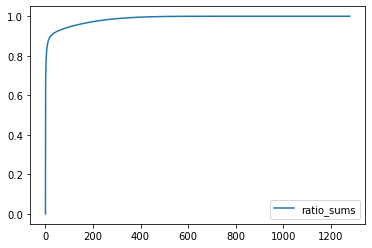

In [20]:
x = df.drop(['behavior','signal','multiple','drone_present'],axis=1).values

pca = decomposition.PCA(n_components=1280)
pca.fit(x)
pca_x = pca.transform(x)

variance = []
for i in range(1280):
    variance.append(sum(pca.explained_variance_ratio_[0:i]))

variance = pd.DataFrame(variance,columns=['ratio_sums'])
plot = variance.plot()
plot.figure.savefig("E:\\ProjectData\\ERAU-REU\\Project-Drone-Behavior\\plots\\pca_variance.png")

In [21]:
presence_labs = df['drone_present']

values = np.array(presence_labs)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

x = df.drop(['behavior','signal','multiple','drone_present'],axis=1).values

pca = decomposition.PCA(n_components=200)
pca.fit(x)
x = pca.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model_pca = keras.Sequential(name='test')
model_pca.add(Dense(64, activation='relu', input_shape=(200,)))
model_pca.add(Dense(32, activation='relu'))
model_pca.add(Dense(2, activation='sigmoid'))

model_pca.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model_pca.build(input_shape=(200,))
model_pca.summary()

fit_pca = model_pca.fit(x = x_train,
        y = y_train, 
        epochs = 100,
        batch_size = 32,
        validation_split = .2,
        verbose=False)

prediction = model_pca.predict(x_test)
prediction_df = pd.DataFrame(prediction, columns=['prob_present','prob_not_present']) 

y_test = pd.DataFrame(y_test,columns=['present','not_present'])

y_pred = y_test >> bind_cols(prediction_df)

y_pred >>= mutate(actual = case_when([y_pred.present == 1, 'present'],
[y_pred.not_present == 1, 'not_present']),
predicted = case_when([y_pred.prob_present > y_pred.prob_not_present, 'present'],
[y_pred.prob_present < y_pred.prob_not_present, 'not_present']))

y_pred >>= mutate(correct = case_when([y_pred.actual == y_pred.predicted, 'yes'],
[y_pred.actual != y_pred.predicted, 'no']),
feature = 'pca')
preds >>= bind_rows(y_pred)


Model: "test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                12864     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 15,010
Trainable params: 15,010
Non-trainable params: 0
_________________________________________________________________


NameError: name 'preds' is not defined

In [22]:
preds.reset_index(inplace=True)


NameError: name 'preds' is not defined

In [23]:
preds.drop(['index','level_0'],axis=1)

NameError: name 'preds' is not defined

In [24]:
preds_agg = preds >> group_by(preds.feature) >> summarize(avg_present = preds.prob_present.mean(),
avg_not_present = preds.prob_not_present.mean(),
total = preds.feature.count())
preds_agg

NameError: name 'preds' is not defined